# Segmentación de clientes

## Cargar datos

In [80]:
# Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
#Leyendo archivo
df_retail = pd.read_csv('datasets/Online_Retail.csv', encoding='unicode_escape')

## Preparar los datos

In [53]:
# Obteniendo información relevante del archivo
print(df_retail.info())
print(df_retail.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            QUANTITY     UNIT_PRICE    CUSTOMER_ID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000     

El método info() nos muestra que tenemos un dataframe de 8 columnas con 541909 entradas, en donde los nombres de las columnas están en mayúsculas. Tenemos valores nulos en las columnas 'DESCRIPTION','COSTUMER_ID', 'REGION'. Con respecto al tipo de datos, para facilitar el trabajo y enriquecer la información se sugiere cambiar la columna 'INVOICE_DATE' a tipo datetime64 y 'COSTUMER_ID' a tipo object(cadena) ya que son números de identificación. Lo mismo sucede con la columna 'INVOICE_NO', la cual se mantiene como object. 

El método describe() por su parte nos muestra que para la columna 'Quantity' tenemos una media de 9.55 artículos ordenados por pedido, aunque parece haber datos atípicos ya que nuestros MAX y MIN van desde -80995 a 80995 respectivamente, aunque, valores negativos? Tal parece que hubo un error de registro por lo que será necesario evaluar dichos datos y eliminarlos si es posible. Con respecto a 'UNIT_PRICE', sucede algo similar con la media de 4.61 por artículo y sus valores MAX y MIN, los cuales alcanzan precios de 38970, sin embargo, se sugiere analizar bien dichos productos ya que en el mercado pueden existir artículos que asciendan a esos precios. Para la columna 'COSTUMER_ID' podemos simplemente ignorarla ya que la información nuevamente funge como identificador y no requerimos hacer calculos con dichos datos.

In [54]:
#Visualización de la tabla
df_retail.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


Lo más destacable que podemos observar es que los valores de la columna 'INVOICE_NO' se repiten en diversas ocasiones, sin embargo, el resto de la información en sus respectivas filas es diferente. Lo que nos dice que un mismo número de factura puede incluir uno o más pedidos con diversidad de artículos. 

## Corregir datos

### Formato snake_case

In [55]:
#Conviertiendo nuestros encabezados al formato snake_case
df_retail.columns = df_retail.columns.str.lower()
df_retail.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'region'],
      dtype='object')

### Valores duplicados

In [56]:
#Identificando valores duplicados
print(df_retail.duplicated().sum())
display(df_retail[df_retail.duplicated()].head())

5268


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01/12/2019 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01/12/2019 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01/12/2019 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01/12/2019 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01/12/2019 11:49,2.95,17920.0,United Kingdom


In [57]:
#Ejemplos de valores duplicados *Únicamente para observar un ejemplo de valores duplicados dentro de la tabla*
example = df_retail[df_retail['invoice_no'] == '575117']
example[example.duplicated()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
449325,575117,23182,TOILET SIGN OCCUPIED OR VACANT,1,08/11/2020 14:22,0.83,12748.0,United Kingdom
449328,575117,23084,RABBIT NIGHT LIGHT,1,08/11/2020 14:22,2.08,12748.0,United Kingdom
449330,575117,22920,HERB MARKER BASIL,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449331,575117,22921,HERB MARKER CHIVES,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449332,575117,22919,HERB MARKER MINT,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449333,575117,22918,HERB MARKER PARSLEY,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449334,575117,22916,HERB MARKER THYME,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449335,575117,22917,HERB MARKER ROSEMARY,1,08/11/2020 14:22,0.65,12748.0,United Kingdom
449336,575117,23182,TOILET SIGN OCCUPIED OR VACANT,1,08/11/2020 14:22,0.83,12748.0,United Kingdom
449341,575117,23005,TRAVEL CARD WALLET I LOVE LONDON,1,08/11/2020 14:22,0.42,12748.0,United Kingdom


In [58]:
#Eliminando valores duplicados
df_retail = df_retail.drop_duplicates()
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    536641 non-null  object 
 1   stock_code    536641 non-null  object 
 2   description   535187 non-null  object 
 3   quantity      536641 non-null  int64  
 4   invoice_date  536641 non-null  object 
 5   unit_price    536641 non-null  float64
 6   customer_id   401604 non-null  float64
 7   region        536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


Perfecto! Hemos encontrado 5268 filas duplicadas y las hemos eliminado exitosamente, lo que causó que nuestro número de registros disminuyera.

### Valores Ausentes

In [59]:
# Identificando valores ausentes
print(df_retail.isna().sum())
display(df_retail[df_retail['description'].isna()].head(10))

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
region               0
dtype: int64


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
622,536414,22139,NaN,56,01/12/2019 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01/12/2019 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01/12/2019 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01/12/2019 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01/12/2019 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,01/12/2019 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,01/12/2019 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,01/12/2019 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,01/12/2019 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,01/12/2019 16:50,0.0,NaN,United Kingdom


Al parecer ha aparecido el primer número negativo en la columna 'quantity'. Lo mejor será sustituir dichos valores por su absoluto de manera que no queden cantidades negativas de artículos. Por otro parte, se sugiere que los valores nulos presentes en 'description' se rellenen con la palabra 'Unknown' y 'costumer_id' se mantenga en valores 'NaN'. 

## Enriquecer datos

In [60]:
#Rellenando valores ausentes
df_retail['description'] = df_retail['description'].fillna('Unknown')
df_retail['quantity'] = df_retail['quantity'].apply(lambda x: abs(x))
df_retail['unit_price'] = df_retail['unit_price'].apply(lambda x: abs(x))
print(df_retail.isna().sum())

invoice_no           0
stock_code           0
description          0
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
region               0
dtype: int64


In [61]:
#Cambiar tipo de datos 'INVOICE_DATE' a tipo datetime64 y 'COSTUMER_ID' a tipo object(cadena)
df_retail['invoice_date'] = pd.to_datetime(df_retail['invoice_date'], format ='%d/%m/%Y %H:%M')
df_retail['customer_id'] =df_retail['customer_id'].astype('object')
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    536641 non-null  object        
 1   stock_code    536641 non-null  object        
 2   description   536641 non-null  object        
 3   quantity      536641 non-null  int64         
 4   invoice_date  536641 non-null  datetime64[ns]
 5   unit_price    536641 non-null  float64       
 6   customer_id   401604 non-null  object        
 7   region        536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


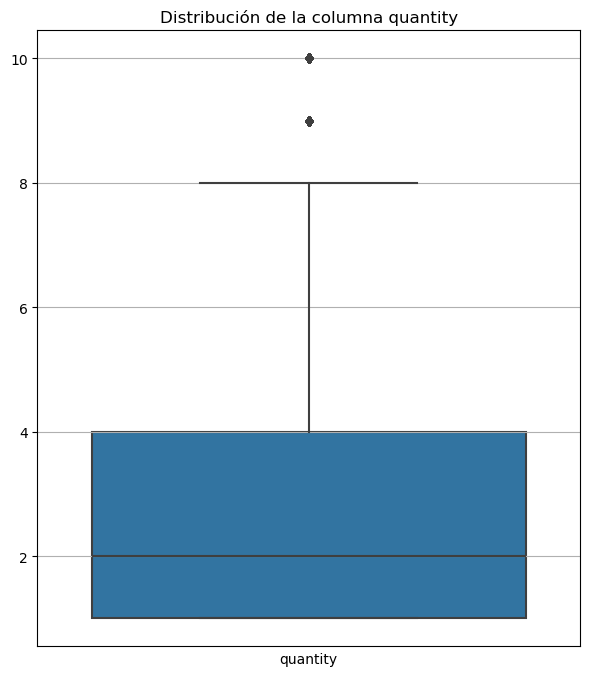

In [67]:
# Revisando la distribución de los datos de quantity 
# Primero encontramos el "bigote" superior
Q3_q = df_retail['quantity'].quantile(0.75)

# De ahí podemos observar los datos sin un sesgo por outliers
filtered_outl = df_retail['quantity'][df_retail['quantity'] < Q3_q]
plt.figure(figsize=(7,8))
sns.boxplot(filtered_outl)
plt.grid(axis='y')
plt.xticks(ticks=[])
plt.xlabel('quantity')
plt.title('Distribución de la columna quantity')
plt.show()

De acuerdo a nuestros diagramas de caja, todos los valores mayores a 9 son considerados atípicos por lo que el 25% de los datos estaría creando un sesgo en el análisis.

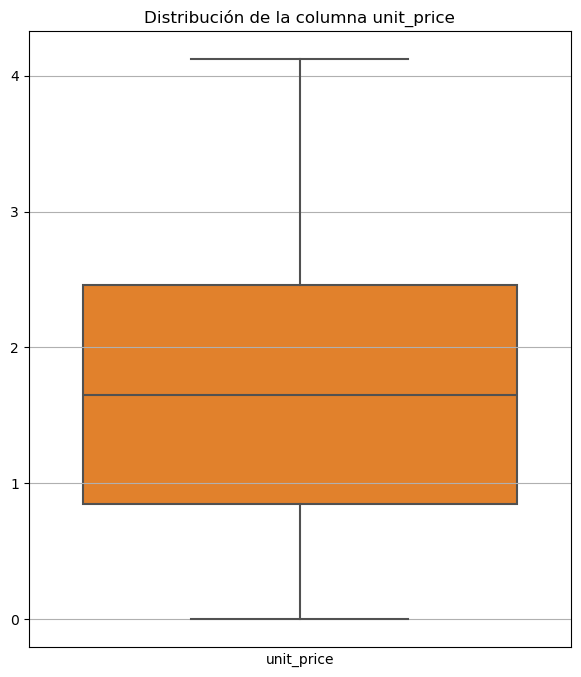

In [70]:
# Revisando la distribución de los datos de unit_price
Q3_up = df_retail['unit_price'].quantile(0.75)
filt_outl = df_retail['unit_price'][df_retail['unit_price'] < Q3_up]
plt.figure(figsize=(7,8))
sns.boxplot(filt_outl, color='tab:orange')
plt.grid(axis='y')
plt.xticks(ticks=[])
plt.xlabel('unit_price')
plt.title('Distribución de la columna unit_price')
plt.show()

De igual manera el último 25% de los datos estan considerados como puntos atípicos dentro de nuestro diagrama de caja. En ambos casos sería mejor no considerar dicha información para no sesgar el análisis estadístico, sin embargo, para el resto de columnas deberían tomarse en cuenta.

## Análizar Datos

### Estadística Descriptiva

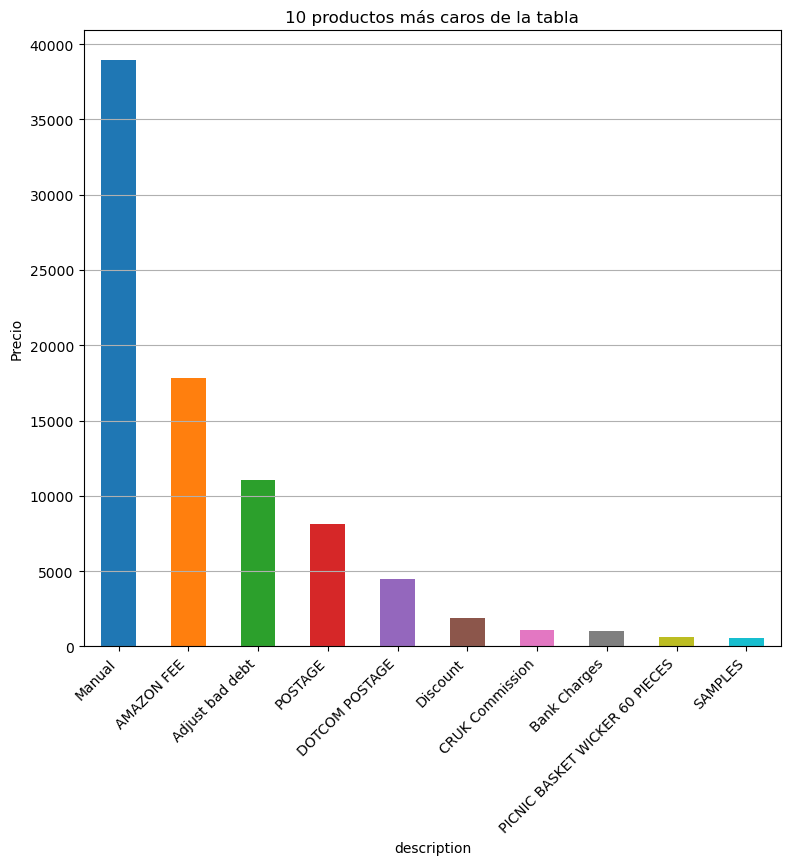

In [94]:
#Los 10 productos más caros
plt.figure(figsize=(9,8))
df_retail.groupby('description')['unit_price'].max().sort_values(ascending = False).head(10).plot(kind = 'bar', color=plt.get_cmap('tab10').colors)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.ylabel('Precio')
plt.title('10 productos más caros de la tabla')
plt.show()

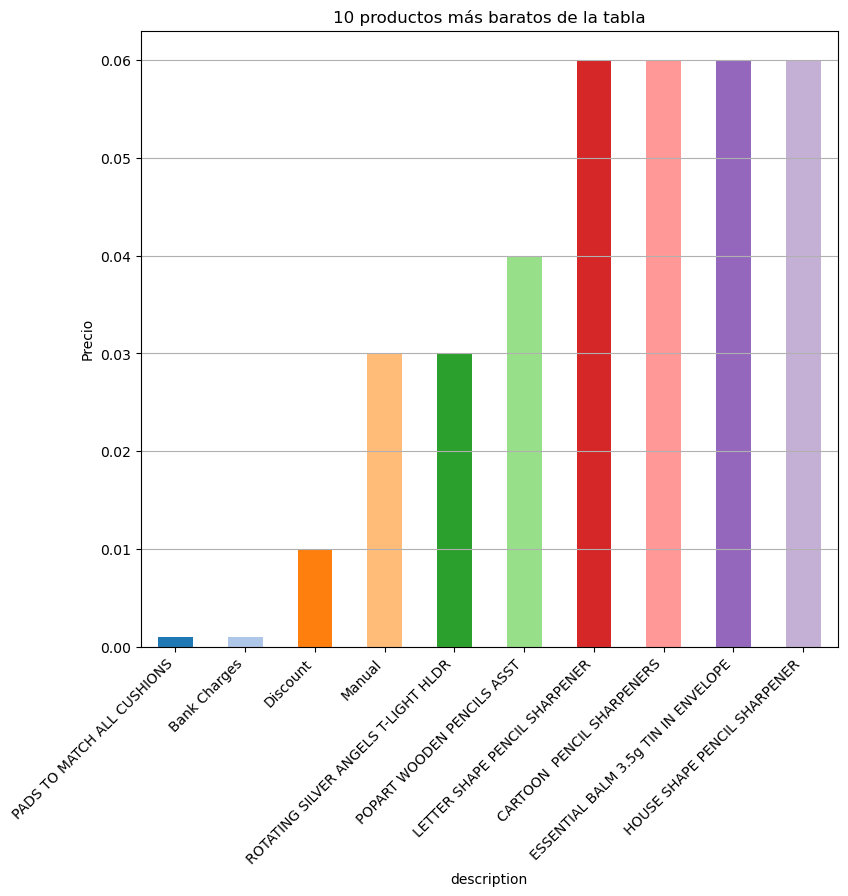

In [96]:
# Los 10 productos más baratos diferentes de 0
cheap = df_retail[df_retail['unit_price'] > 0]
plt.figure(figsize=(9,8))
cheap.groupby('description')['unit_price'].min().sort_values().head(10).plot(kind = 'bar',color=plt.get_cmap('tab20').colors)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.ylabel('Precio')
plt.title('10 productos más baratos de la tabla')
plt.show()

<Axes: xlabel='description'>

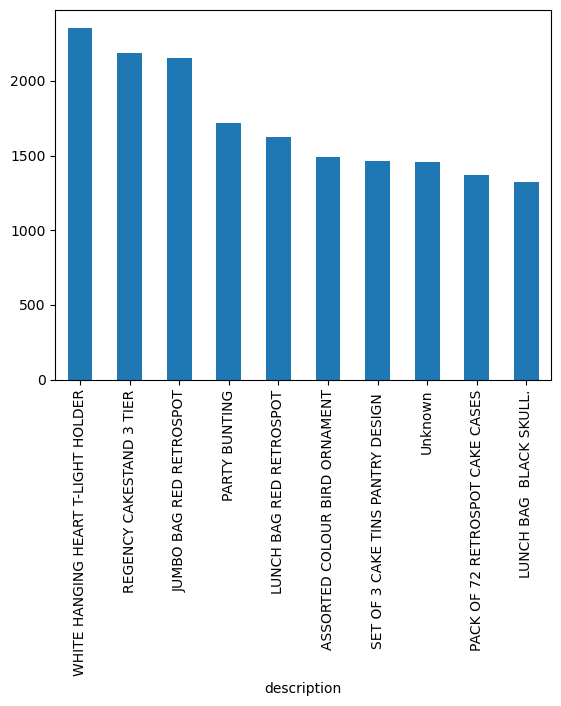

In [32]:
# Los 10 productos más vendidos
df_retail.groupby('description')['invoice_no'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='month'>

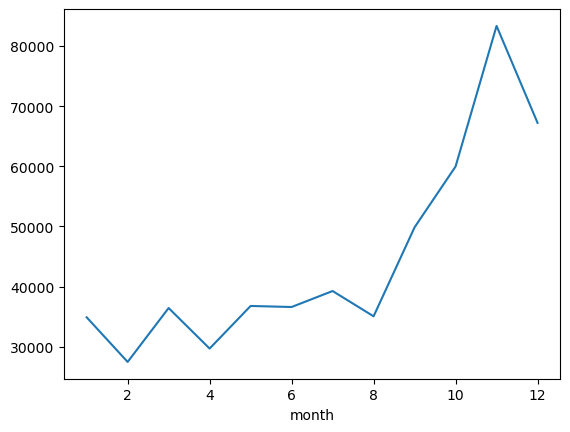

In [33]:
#Meses del año donde más se hicieron ventas
df_retail['month'] = df_retail['invoice_date'].dt.month
df_retail.groupby('month')['invoice_date'].count().plot(kind = 'line')

<Axes: xlabel='hour'>

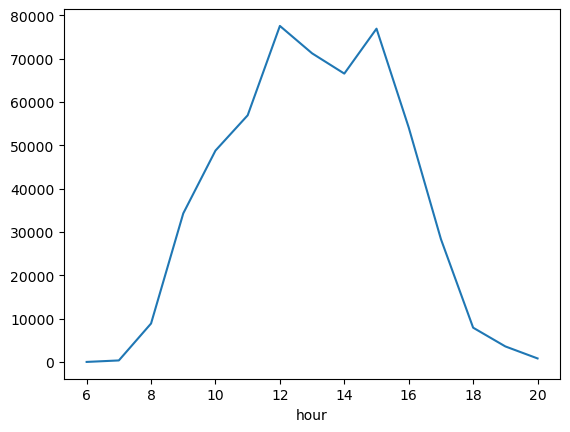

In [34]:
#Hora del día en la que más se hacen ventas
df_retail['hour'] = df_retail['invoice_date'].dt.hour
df_retail.groupby('hour')['invoice_date'].count().plot(kind = 'line')

<Axes: xlabel='day'>

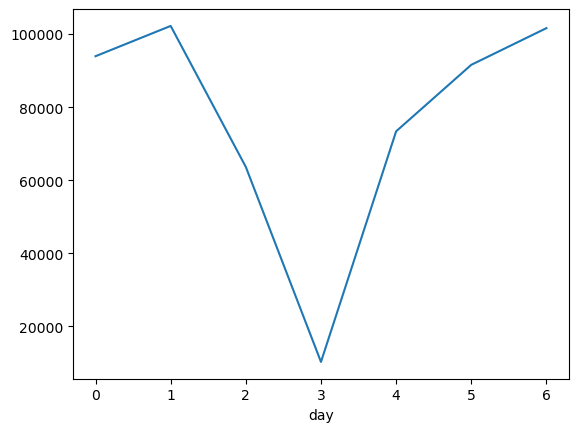

In [35]:
#Dias en los que se hacen más ventas
df_retail['day'] = df_retail['invoice_date'].dt.dayofweek
df_retail.groupby('day')['invoice_date'].count().plot(kind = 'line')

<Axes: ylabel='stock_code'>

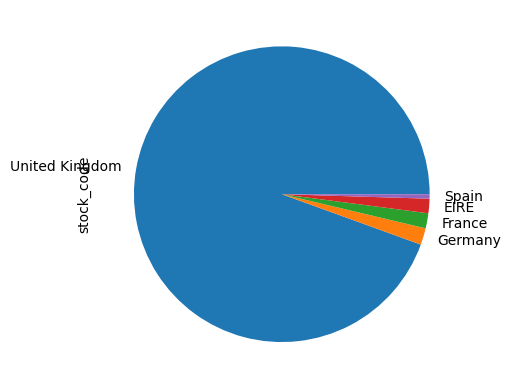

In [36]:
#Paises que más compras hicieron
df_retail.groupby('region')['stock_code'].count().sort_values(ascending = False).head(5).plot(kind = 'pie')

<Axes: xlabel='description'>

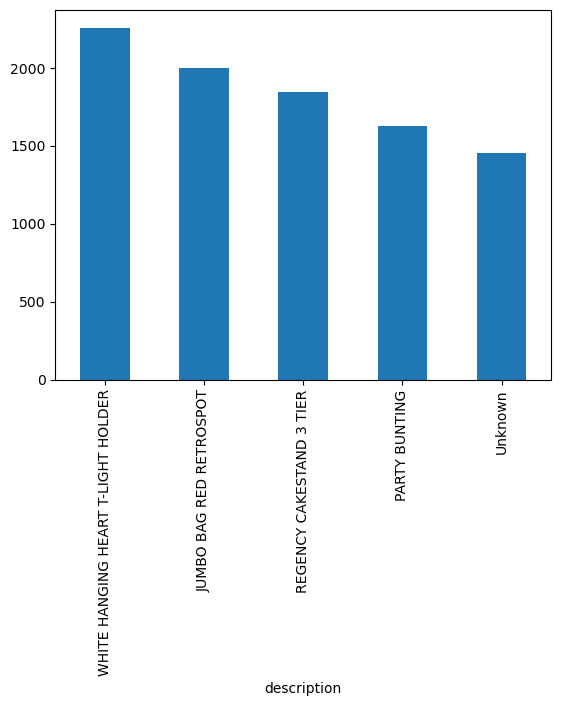

In [37]:
#Productos más comprados en Reino Unido
top_uk = df_retail[df_retail['region'] == 'United Kingdom']
top_uk.groupby('description')['invoice_no'].count().sort_values(ascending = False).head(5).plot(kind = 'bar')

<Axes: xlabel='description'>

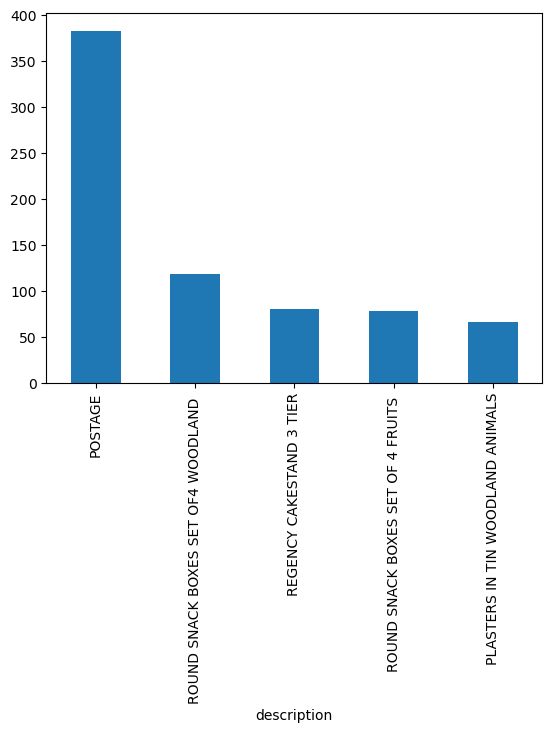

In [38]:
#Productos más comprados en Reino Unido
top_ger = df_retail[df_retail['region'] == 'Germany']
top_ger.groupby('description')['invoice_no'].count().sort_values(ascending = False).head(5).plot(kind = 'bar')

<Axes: xlabel='description'>

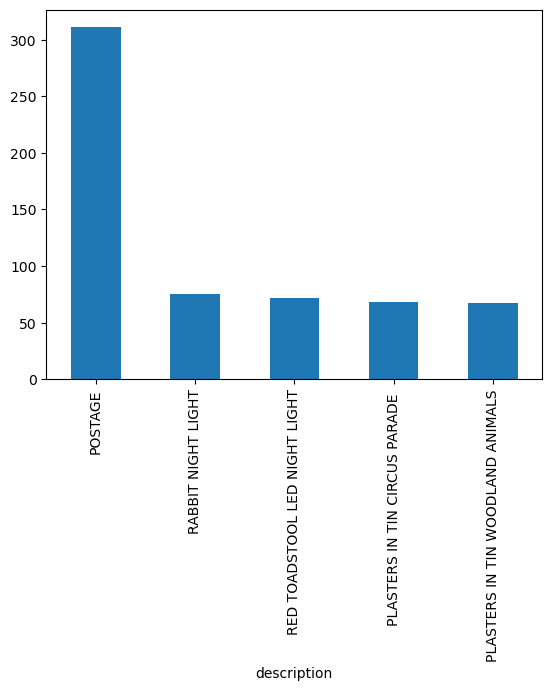

In [39]:
#Productos más comprados en Francia
top_fra = df_retail[df_retail['region'] == 'France']
top_fra.groupby('description')['invoice_no'].count().sort_values(ascending = False).head(5).plot(kind = 'bar')

### Segmentación de clientes

#### Recency

In [42]:
#Creando una columna 'Recency'
df_retail['recency'] = df_retail['invoice_date'].max() - df_retail['invoice_date']
df_retail['recency']=df_retail['recency'].dt.days

#### Frequency

In [44]:
#Creando una columna 'Frequency'
frec = df_retail.groupby('customer_id')['invoice_no'].count()
rec = df_retail.groupby('customer_id')['recency'].max()
seg = pd.concat([frec,rec], axis = 'columns')

#### Monetary

In [145]:
#Creando una columna 'Monetary'(el dinero gastado por cada cliente en productos)
df_retail['sales'] = df_retail['quantity']*df_retail['unit_price']
mone = df_retail.groupby('customer_id')['sales'].mean()

In [157]:
#Unión de tabla de segmentación de clientes
df_seg = pd.concat([seg, mone],axis = 'columns')
df_seg.columns = ['recency', 'frequency', 'monetary']
df_seg.head()

,recency,frequency,monetary
customer_id,,,
12346.0,2,326,77183.600000
12347.0,182,367,23.681319
12348.0,31,358,57.975484
12349.0,73,18,24.076027
12350.0,17,310,19.670588


#### Valor del Cliente a traves del tiempo (CTLV)
CLV = promedio de compra x frecuencia de compra x duración de la relación comercial

In [159]:
CLV = df_seg['monetary'] * df_seg['frequency'] * df_seg['recency']
CLV.head()

customer_id
12346.0    50323707.20
12347.0     1581770.00
12348.0      643411.92
12349.0       31635.90
12350.0      103664.00
dtype: float64